In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [174]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

from statsmodels.tsa.stattools import adfuller

In [175]:
pwd

'c:\\Users\\moham\\OneDrive\\Desktop\\Research Project\\Codes'

In [6]:
df = pd.read_csv('C:/Users/moham/OneDrive/Desktop/Research Project/Codes/cbsl_data.csv')

In [7]:
df

,Unnamed: 0,3.2 Economic Classification of Government Revenue (1990-2021),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,Rs. million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Year,Tax Revenue,NaN,NaN,Non-Tax Revenue,Total Revenue,Direct tax / Total Tax (%),Indirect tax / Total Tax (%),Total Tax / Total Revenue (%),Non tax / Total Revenue (%),NaN,NaN,NaN
2,NaN,NaN,Direct Tax,Indirect Tax,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1990,"7,335","53,871","61,206","6,758","67,964",12.0,88.0,90.1,9.9,NaN,NaN,NaN
4,NaN,1991,"9,722","58,435","68,157","8,022","76,179",14.3,85.7,89.5,10.5,NaN,NaN,NaN
5,NaN,1992,"10,965","65,388","76,353","9,428","85,781",14.4,85.6,89.0,11.0,NaN,NaN,NaN
6,NaN,1993,"12,543","73,348","85,891","12,448","98,339",14.6,85.4,87.3,12.7,NaN,NaN,NaN
7,NaN,1994,"15,277","84,140","99,417","10,621","110,038",15.4,84.6,90.3,9.7,NaN,NaN,NaN
8,NaN,1995,"17,161","101,382","118,543","17,715","136,258",14.5,85.5,87.0,13.0,NaN,NaN,NaN
9,NaN,1996,"20,751","109,451","130,202","16,077","146,279",15.9,84.1,89.0,11.0,NaN,NaN,NaN


In [176]:
#data = pd.read_csv('C:/Users/moham/OneDrive/Desktop/Research Project/Codes/tax.csv')

In [177]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Tax revenue (current LCU),GC.TAX.TOTL.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Tax revenue (current LCU),GC.TAX.TOTL.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Tax revenue (current LCU),GC.TAX.TOTL.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.929741e+10,8.111484e+10,8.096584e+10,9.275076e+10,1.162100e+11,1.272410e+11,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Tax revenue (current LCU),GC.TAX.TOTL.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Tax revenue (current LCU),GC.TAX.TOTL.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.812070e+12,1.871680e+12,1.939830e+12,1.534810e+12,1.610690e+12,1.868950e+12,2.471740e+12,3.060460e+12,NaN,NaN


In [178]:
 #function for dataset -> dataframe
def converting_worldbank_dataset(s_year,dataframe):
    df=dataframe
    df.rename(columns = {'Country Name':'CountryName'}, inplace = True)
    index=df.query("CountryName == 'Sri Lanka'").index.to_list()[0]
    df.rename(columns = {'Indicator Name':'IndicatorName'}, inplace = True)
    ind_name=df["IndicatorName"].to_list()[0]
    column_index = df.columns.get_loc(s_year)
    year=df.columns.to_list()[column_index:]
    value=df.iloc[index, column_index:].to_list()
    new_df=pd.DataFrame(zip(year,value),columns =['Year',ind_name])
    return new_df

In [179]:
    #External Debt Convertion
df=pd.read_csv("C:/Users/moham/OneDrive/Desktop/Research Project/Codes/tax.csv",sep=",")
year="1990"
data =converting_worldbank_dataset(year,df)
#gdp = gdp.drop(gdp[gdp['Year'] == 'Unnamed: 66'].index) #Dropping rows with values:'Unnamed: 66'
data['Year']=data['Year'].astype(str).astype(int) #Converting object to int

data.head()

,Year,Tax revenue (current LCU)
0,1990,6.120600e+10
1,1991,6.815700e+10
2,1992,7.635300e+10
3,1993,8.727400e+10
4,1994,9.941700e+10


In [180]:
data.tail()

,Year,Tax revenue (current LCU)
27,2017,1.670180e+12
28,2018,1.712320e+12
29,2019,1.734930e+12
30,2020,1.216540e+12
31,2021,NaN


#General process of arima model
#1> Visualize the time series data
#2> Make the series data stationary
#3> Plot the Correlation and Auto Correlation charts
#4> Use the model to make predictions

Cleanse the data

In [181]:
#cleaning the data
data.columns=["Year","Tax_revenue"]
data.head()

,Year,Tax_revenue
0,1990,6.120600e+10
1,1991,6.815700e+10
2,1992,7.635300e+10
3,1993,8.727400e+10
4,1994,9.941700e+10


In [182]:
data.dtypes

Year             int32
Tax_revenue    float64
dtype: object

In [183]:
#getting the mean of tax revenue ammount and fill it to null, if theres any
data["Tax_revenue"] = data["Tax_revenue"].astype("float64")
m=round(data["Tax_revenue"].mean(),2)
data["Tax_revenue"].fillna(m,inplace=True)

In [184]:
data.head()


,Year,Tax_revenue
0,1990,6.120600e+10
1,1991,6.815700e+10
2,1992,7.635300e+10
3,1993,8.727400e+10
4,1994,9.941700e+10


EDA

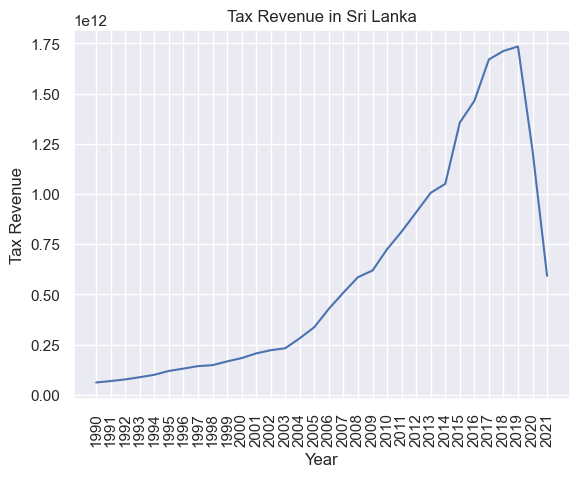

In [185]:
# Compute the number of years in the dataset
num_years = len(data['Year'])

# Set the x-axis ticks to represent each year
x_ticks = range(data['Year'][0], data['Year'][num_years - 1] + 1)

# Plot the data
plt.plot(data['Year'], data['Tax_revenue'])
plt.xticks(x_ticks, rotation='vertical')  # Set the x-axis ticks with yearly intervals
plt.xlabel('Year')
plt.ylabel('Tax Revenue')
plt.title('Tax Revenue in Sri Lanka')

# Display the plot
plt.show()


In [186]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [187]:
#Assuming your yearly data is stored in a DataFrame called 'yearly_data' with columns
#Convert the "Year" column to datetime format

data[ 'Year'] = pd.to_datetime(data[ 'Year'], format='%Y')

#Set the "Year" column as the index

data.set_index('Year', inplace=True)


#Resample the data to quarterly frequency and interpolate missing values 
quarterly_data = data.resample('Q').mean().interpolate()

#Perform seasonal decomposition

result = seasonal_decompose(quarterly_data['Tax_revenue'], model="additive", period=4)

#Extract the trend, seasonal, and residual components

trend = result.trend 
seasonal =result.seasonal
residual =result.resid

#Create a DataFrame with the decomposed components
quarterly_decomposition = pd.DataFrame({'Trend': trend, 'Seasonal': seasonal, 'Residual': residual})

# Adjust the seasonal component to have the same length as the original data
adjusted_seasonal = quarterly_decomposition['Seasonal'].repeat(1)[:len(quarterly_data)]

# Subtract the adjusted seasonal component from the original data
adjusted_data = quarterly_data['Tax_revenue'] - adjusted_seasonal

# Create a DataFrame with the adjusted data
adjusted_quarterly_data = pd.DataFrame({'TaxRevenue_Adjusted': adjusted_data})




In [191]:
adjusted_quarterly_data.head()

,TaxRevenue_Adjusted
Year,
1990-03-31,5.956173e+10
1990-06-30,6.327260e+10
1990-09-30,6.566806e+10
1990-12-31,6.674810e+10
1991-03-31,6.651273e+10


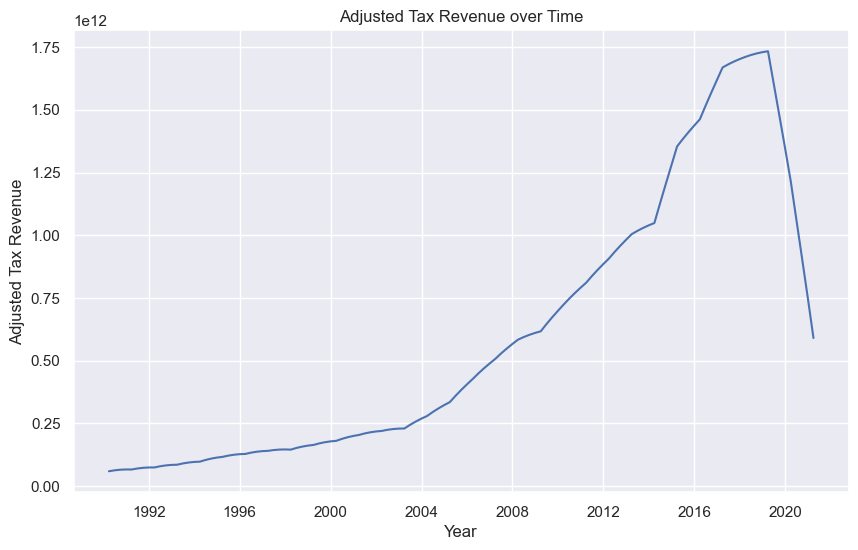

In [196]:
# Plot the adjusted tax revenue data
plt.figure(figsize=(10, 6))
plt.plot(adjusted_quarterly_data.index, adjusted_quarterly_data['TaxRevenue_Adjusted'])
plt.xlabel('Year')
plt.ylabel('Adjusted Tax Revenue')
plt.title('Adjusted Tax Revenue over Time')
plt.grid(True)
plt.show()

Stationary check

In [198]:
test_result = adfuller(adjusted_quarterly_data['TaxRevenue_Adjusted'])

In [199]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Tax_revenue):
    result=adfuller(Tax_revenue)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [200]:
adfuller_test(adjusted_quarterly_data['TaxRevenue_Adjusted'])

ADF Test Statistic : -2.610094344590952
p-value : 0.09092886744951961
#Lags Used : 9
Number of Observations Used : 115
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Differencing

In [201]:
adjusted_quarterly_data['Tax revenue First Difference'] = adjusted_quarterly_data['TaxRevenue_Adjusted'] - adjusted_quarterly_data['TaxRevenue_Adjusted'].shift(1)

In [202]:
adjusted_quarterly_data['TaxRevenue_Adjusted'].shift(1)

Year
1990-03-31             NaN
1990-06-30    5.956173e+10
1990-09-30    6.327260e+10
1990-12-31    6.566806e+10
1991-03-31    6.674810e+10
                  ...     
2020-03-31    1.346466e+12
2020-06-30    1.214896e+12
2020-09-30    1.060757e+12
2020-12-31    9.053024e+11
2021-03-31    7.485327e+11
Freq: Q-DEC, Name: TaxRevenue_Adjusted, Length: 125, dtype: float64

In [203]:
adjusted_quarterly_data['Seasonal First Difference']=adjusted_quarterly_data['TaxRevenue_Adjusted']-adjusted_quarterly_data['TaxRevenue_Adjusted'].shift(4)

In [205]:
 adjusted_quarterly_data.head(14)

,TaxRevenue_Adjusted,Tax revenue First Difference,Seasonal First Difference
Year,,,
1990-03-31,5.956173e+10,NaN,NaN
1990-06-30,6.327260e+10,3.710873e+09,NaN
1990-09-30,6.566806e+10,2.395458e+09,NaN
1990-12-31,6.674810e+10,1.080042e+09,NaN
1991-03-31,6.651273e+10,-2.353726e+08,6.951000e+09
1991-06-30,7.053485e+10,4.022123e+09,7.262250e+09
1991-09-30,7.324156e+10,2.706708e+09,7.573500e+09
1991-12-31,7.463285e+10,1.391292e+09,7.884750e+09
1992-03-31,7.470873e+10,7.587742e+07,8.196000e+09


In [207]:
## Again test dickey fuller test
adfuller_test(adjusted_quarterly_data['Seasonal First Difference'].dropna())

ADF Test Statistic : -1.224759551855274
p-value : 0.6628551348737468
#Lags Used : 5
Number of Observations Used : 115
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


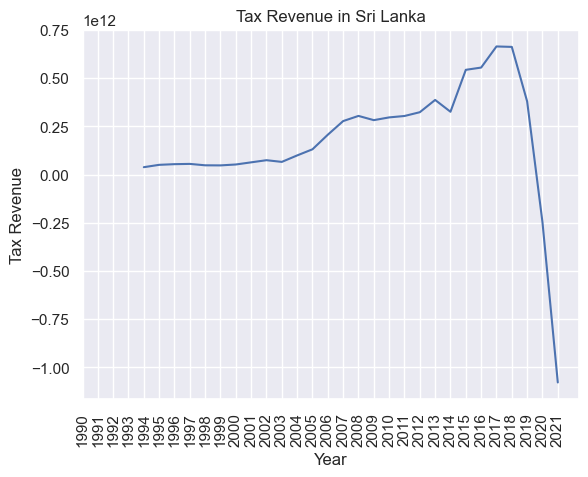

In [147]:

# Compute the number of years in the dataset
num_years = len(data['Year'])

# Set the x-axis ticks to represent each year
x_ticks = range(data['Year'][0], data['Year'][num_years - 1] + 1)

# Plot the data
plt.plot(data['Year'], data['Seasonal First Difference'])
plt.xticks(x_ticks, rotation='vertical')  # Set the x-axis ticks with yearly intervals
plt.xlabel('Year')
plt.ylabel('Tax Revenue')
plt.title('Tax Revenue in Sri Lanka')

# Display the plot
plt.show()

Auto Regressive Model

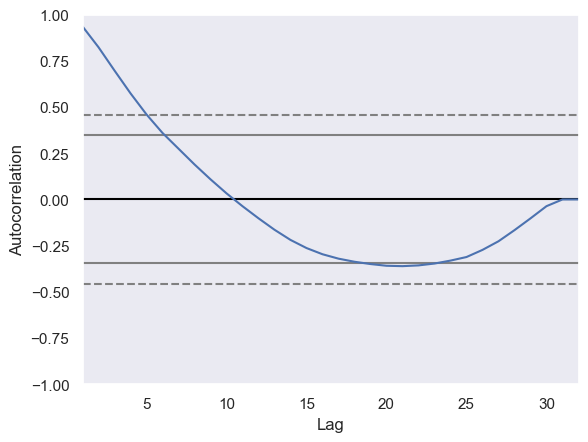

In [150]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Tax_revenue'])
plt.show()

In [155]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [156]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'data' is your time series data
model = ARIMA(data['Tax_revenue'], order=(1, 1, 1))
model_fit = model.fit()


In [159]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Tax_revenue   No. Observations:                   32
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -835.471
Date:                Sun, 21 May 2023   AIC                           1676.942
Time:                        00:50:28   BIC                           1681.244
Sample:                             0   HQIC                          1678.344
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9298      0.354      2.628      0.009       0.236       1.623
ma.L1         -0.0124      0.369     -0.033      0.973      -0.736       0.712
sigma2      1.701e+22        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               141.03
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):             157.66   Skew:                            -2.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.79e+62. Standard errors may be unstable.
"""

In [165]:
time_train = data.iloc[:44, :].copy()
time_test = data.iloc[44:, :].copy()

In [168]:
from fbprophet import Prophet

in_model = Prophet()
in_model.fit(time_train)

ModuleNotFoundError: No module named 'fbprophet'